### Name - Nishant Gupta

### Subject - BDAT1004 - Data Programming Section B

### Assignment Submission - Problem Set 3

#### Question - 1

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

In [7]:
import pandas as pd   #Step-1
import numpy as np    #Step-1
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')    #Step-2 and 3
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [8]:
#Step 4

users[["age", "occupation"]].groupby("occupation").mean()


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [9]:
#Step 5

def Occupation_cnt_male(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['male'] = users['gender'].apply(Occupation_cnt_male)

male_ratio = users.groupby('occupation').male.sum() / users.occupation.value_counts() * 100 

male_ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [10]:
# Step 6
users.groupby('occupation').age.agg(['max', 'min'])

,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


In [16]:
# Step 7
users.head() 
users.groupby(['occupation','gender']).age.mean().reset_index()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [14]:
#Step 8

usersm = users.groupby('occupation')['gender'].value_counts(normalize=True)*100
type(usersm)

usersd = usersm.to_frame().rename(columns = {'gender':'percentage'}).reset_index()
usersd

,occupation,gender,percentage
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


#### Question - 2

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [17]:
import pandas as pd #Step 1
import numpy as np  #Step 1 
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv') #Step 2 and 3
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [18]:
#Step 4
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [19]:
#Step 5
euro12.Team.nunique()

16

In [20]:
#Step 6
euro12.shape[1]

35

In [21]:
#Step-7

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [25]:
#Step-8
import warnings
warnings.filterwarnings('ignore')

discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [26]:
#Step-9

discipline['Yellow Cards'].mean()

7.4375

In [27]:
#Step-10

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [28]:
#Step-11

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [29]:
#Step-12

euro12.head(7).iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32


In [30]:
#Step-13

euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [31]:
#Step-14

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#### Question - 3

#### Housing
Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299rt the necessary libraries

In [36]:
import numpy as np   #Step-1
import pandas as pd  #Step-1
random_data = pd.Series(np.random.randint(1, 4, size=(100)).tolist())    #Step-2
random_data1 = pd.Series(np.random.randint(1, 3, size=(100)))            #Step-2
random_data2 = pd.Series(np.random.randint(10000, 30000, size=(100)))    #Step-2
df = pd.DataFrame(data = [random_data, random_data1,random_data2])       #Step-3
df = df.T
df1 = df.rename(columns = {0 : 'bedrs', 1 : 'bathrs', 2 : 'price_sqr_meter'}) #Step-4
df1

,bedrs,bathrs,price_sqr_meter
0,3,1,26310
1,2,1,10079
2,1,2,21318
3,2,2,25602
4,3,1,29319
...,...,...,...
95,3,2,17749
96,3,1,21259
97,2,2,25162
98,3,1,10658


In [37]:
#Step-5

bigcolumn = pd.DataFrame(pd.concat([random_data,random_data1,random_data2], names='A'))
bigcolumn

,0
0,3
1,2
2,1
3,2
4,3
...,...
95,17749
96,21259
97,25162
98,10658


#### Step-6: The size of each of the 3 different series has been set up as 100. However, it seems like it is only going to the index 99 because in Python indexing starts at 0 rather 1 and the second element has an index 1... and 100th element has an index 99. Hence, for 100 elements index will only go till 99.

In [39]:
# Step-7

bigcolumn.reset_index(inplace = True, drop = True)
bigcolumn

,0
0,3
1,2
2,1
3,2
4,3
...,...
295,17749
296,21259
297,25162
298,10658


#### Question - 4

Wind Statistics

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the  indspeeds at each location over all the days A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [44]:
#Step-1

import pandas as pd
import numpy as np
import datetime as dt

#Step-2 & 3
df = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]])
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [45]:
#Step 4

import datetime

def fix_century(x):
    if x.year > 1989:
        year = x.year - 100 
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)


df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(fix_century)
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
#Step 5

df["Yr_Mo_Dy"] = pd.to_datetime(df["Yr_Mo_Dy"])

df = df.set_index('Yr_Mo_Dy')

df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [47]:
#Step 6

df.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [48]:
#Step 7

data.shape[0] - data.isnull().sum()

data.notnull().sum()

Yr_Mo_Dy    6574
RPT         6568
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

In [49]:
#Step 8

df.sum().sum() / df.notna().sum().sum()

10.227883764282181

In [50]:
#Step 9

df.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [51]:
#Step 10

df_statistics = pd.DataFrame()

df_statistics['min'] = df.min(axis = 1)
df_statistics['max'] = df.max(axis = 1)  
df_statistics['mean'] = df.mean(axis = 1)
df_statistics['std'] = df.std(axis = 1) 

df_statistics.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [52]:
#Step 11

df.loc[df.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [53]:
#Step 12

df.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [54]:
#Step 13

df.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [55]:
#Step 14

df.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [56]:
#Step-15

df.groupby(lambda d: (d.month, d.year)).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
"(1, 1961)",14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
"(1, 1962)",14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
"(1, 1963)",14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
"(1, 1964)",12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
"(1, 1965)",15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
...,...,...,...,...,...,...,...,...,...,...,...,...
"(12, 1974)",18.511290,17.805806,14.773871,9.734839,16.944194,10.153871,16.602903,15.034194,14.883548,12.915161,18.803548,24.124194
"(12, 1975)",11.655484,8.686774,11.217742,4.478387,6.628710,4.178065,10.351290,6.176129,8.401935,7.342903,12.028710,18.689032
"(12, 1976)",11.962258,10.086774,10.474516,3.383871,7.645484,6.148387,8.034516,4.500000,5.952258,6.147742,7.814839,14.346774
"(12, 1977)",14.751935,12.744839,13.469677,6.592258,11.247742,9.466774,13.231613,10.703871,10.401613,9.415484,13.237419,19.299677



#### Question - 5

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

In [60]:
# Step 1, 2 and 3

chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [61]:
#Step 4

chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [62]:
#Step 5

len(chipotle)


4622

In [63]:
#Step-6

len(chipotle.columns)

5

In [64]:
#Step-7

chipotle.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [65]:
#Step-8

chipotle.index


RangeIndex(start=0, stop=4622, step=1)

In [66]:
#Step-9

chipotle_Gruoped=chipotle.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
chipotle_Gruoped.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [67]:
#Step-10

chipotle_Gruoped.head(1).quantity



item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [68]:
#Step-11

chipotle.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [69]:
#Step-12

chipotle['quantity'].sum()


4972

In [79]:
#Step-13

def turn_float(x):
    return float(x[1:-1])
chipotle.item_price = chipo.item_price.apply(turn_float)
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [80]:
#Step-14

chipotle['quantity']=chipotle['quantity'].astype(float)
chipotle['Revenue']=chipotle['item_price']*chipo['quantity']
chipotle['Revenue'].sum()

39237.02

In [81]:
#Step-15

chipotle['order_id'].value_counts().count()

1834

In [82]:
#Step-16

chipotle.groupby('order_id').Revenue.agg('mean')

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: Revenue, Length: 1834, dtype: float64

In [83]:
#Step-17

chipotle['item_name'].value_counts().count()

50


#### Question - 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!



In [86]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


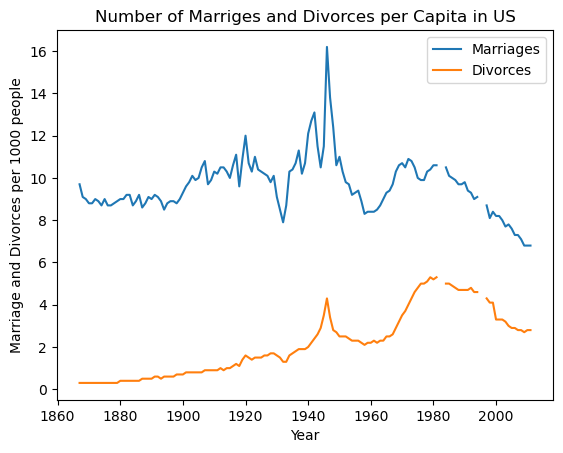

In [92]:
plt.plot(data['Year'], data['Marriages_per_1000'])
plt.plot(data['Year'], data['Divorces_per_1000'])
plt.title('Number of Marriges and Divorces per Capita in US')
plt.xlabel('Year')
plt.ylabel('Marriage and Divorces per 1000 people')
plt.legend(['Marriages','Divorces'])
plt.show()


#### Question - 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!



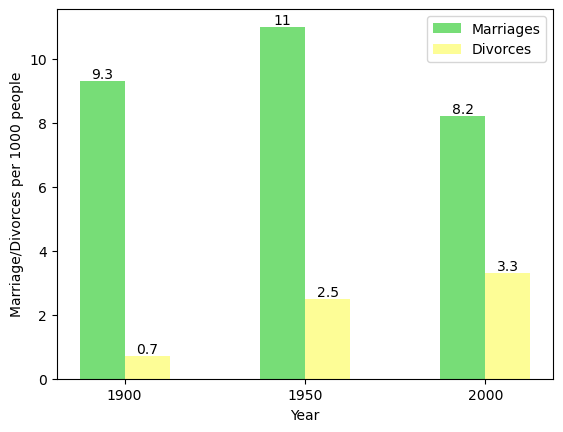

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()

data_new = data.loc[data['Year'] == 1900]
data_new = data_new.append(data.loc[data['Year'] == 1950])
data_new = data_new.append(data.loc[data['Year'] == 2000])

fig, p = plt.subplots()
bar_width = 0.25
x = np.arange(3)

p1 = plt.bar(x, data_new['Marriages_per_1000'], bar_width, label="Marriages", color='#77DD77')
p2 = plt.bar(x + bar_width, data_new['Divorces_per_1000'], bar_width, label="Divorces", color='#FDFD96')

plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per 1000 people')
plt.xticks(x + (bar_width/2) , ("1900", "1950", "2000"))
plt.legend()
plt.bar_label(p1)
plt.bar_label(p2)
plt.show()

#### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

Text(0.5, 0, 'Kill count')

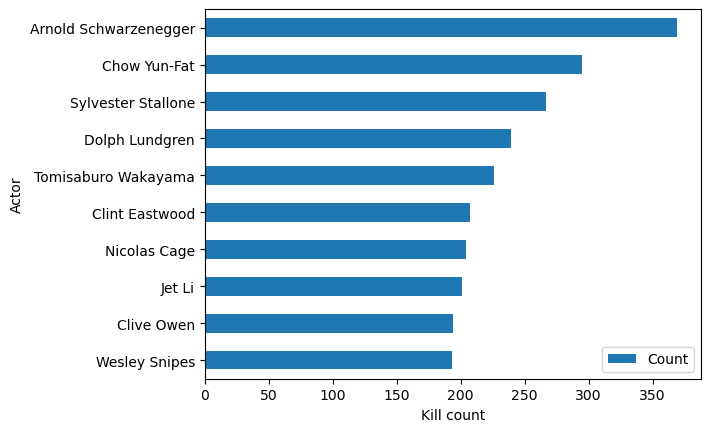

In [112]:
actorHollywood=pd.read_csv('actor_kill_counts.csv')

x=actorHollywood.set_index('Actor').sort_values('Count').plot(kind='barh')
x.set_xlabel("Kill count")

#### Question-9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

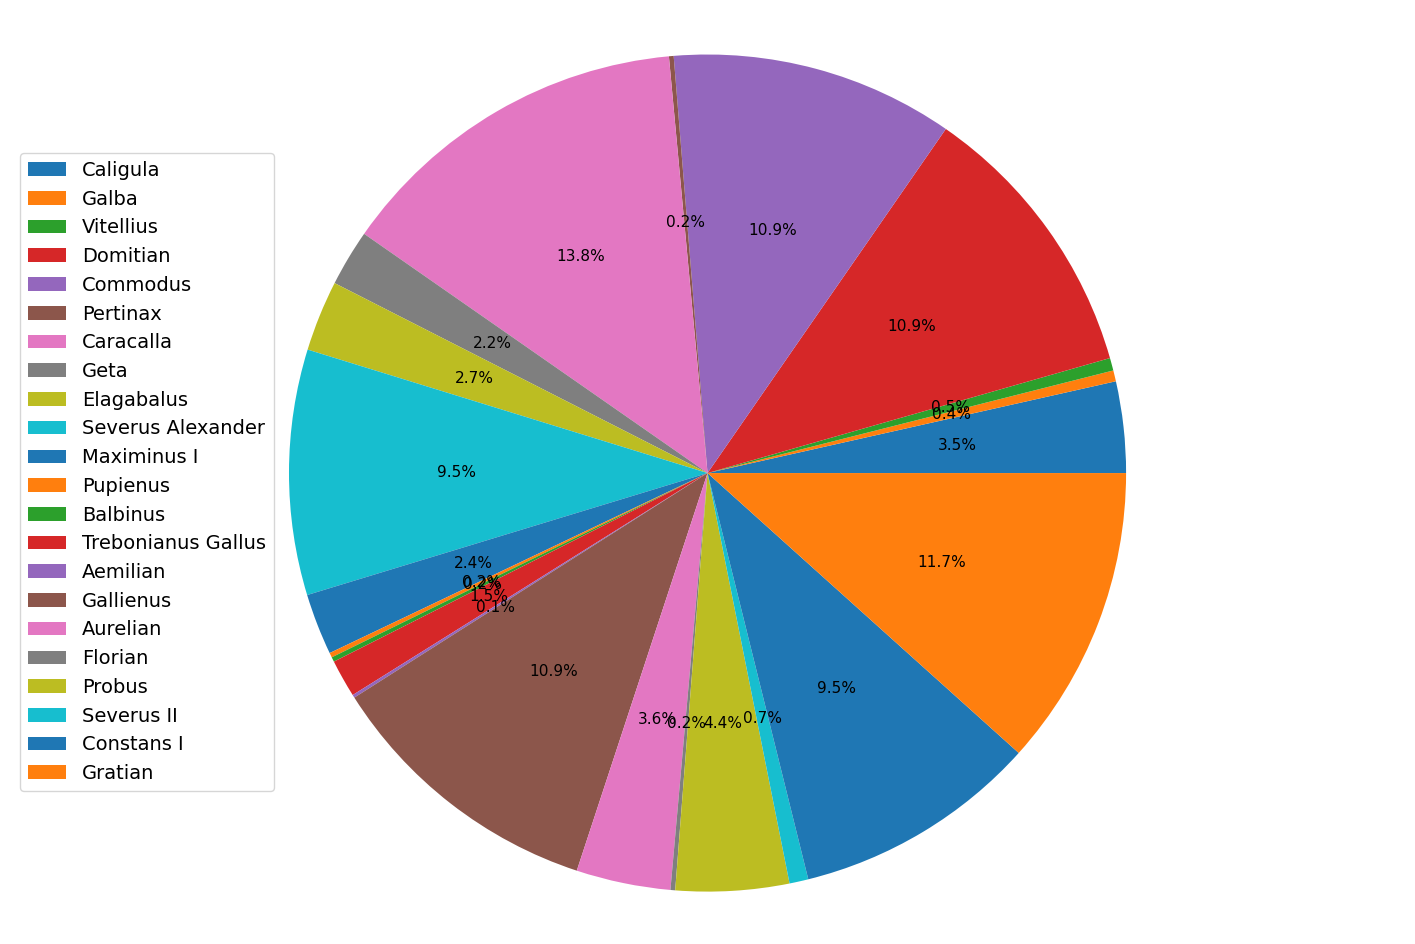

In [106]:
RomanEmperor = pd.read_csv('roman-emperor-reigns.csv')
assassinated_df = RomanEmperor[RomanEmperor.Cause_of_Death == 'Assassinated']

labels = assassinated_df.Emperor 
sizes = assassinated_df.Length_of_Reign
fig, ax = plt.subplots(figsize=(18, 12))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 11})
plt.axis('equal')
plt.legend( labels, loc='center left', fontsize = 14)
plt.show()

#### Question-10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Color each dot according to its year

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

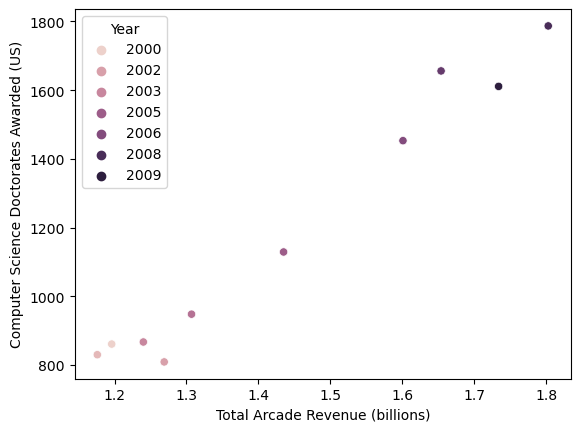

In [111]:
import pandas as pd
import seaborn as sns
total_revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', 
                data=total_revenue)